<a href="https://colab.research.google.com/github/nicolasquant/Iniciacao_Cientifica/blob/main/Otimizacao_port_financeiro_VQE_mes_de_alta_11_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pylatexenc
!pip install yfinance
!pip install requests
!pip install qiskit==0.45.3
!pip install qiskit-finance==0.4.0
!pip install qiskit-aer==0.12.2
!pip install qiskit-algorithms==0.3.0
!pip install qiskit-optimization==0.6.0

In [ ]:
from qiskit.circuit.library import TwoLocal
from qiskit.result import QuasiDistribution
from qiskit_aer.primitives import Sampler
from qiskit_algorithms import NumPyMinimumEigensolver, SamplingVQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import yfinance as yf
import requests
import scipy.optimize as optimization

In [ ]:
!pip install --upgrade yfinance

# Realizando o tratamento de dados de algumas ações do mercado brasileiro - A abordagem desse código, será para o período de alta do mercado

In [ ]:
# as ações abaixo são as ações disponiveis na data de análise especificada
'''
tickers_Amanda = [
    'ELET3.SA', 'SLCE3.SA', 'UGPA3.SA', 'JBSS3.SA', 'TEND3.SA', 'PETR4.SA', 'HYPE3.SA', 'EMBR3.SA', 'PSSA3.SA', 'TIMS3.SA',
    'CCRO3.SA', 'SANB11.SA', 'MGLU3.SA', 'ITSA4.SA', 'DIRR3.SA', 'EGIE3.SA', 'SMTO3.SA', 'MULT3.SA', 'LREN3.SA', 'KLBN11.SA',
    'SBSP3.SA', 'MDIA3.SA', 'CYRE3.SA', 'ENEV3.SA', 'STBP3.SA', 'CSAN3.SA', 'CPFE3.SA', 'DXCO3.SA', 'B3SA3.SA', 'ABEV3.SA',
    'TAEE11.SA', 'TRPL4.SA', 'FLRY3.SA', 'MRVE3.SA', 'CPLE6.SA', 'ECOR3.SA', 'PCAR3.SA', 'SUZB3.SA', 'ARZZ3.SA', 'VIVT3.SA',
    'GGBR4.SA', 'CSMG3.SA', 'BBAS3.SA', 'TOTS3.SA', 'BBDC4.SA', 'RENT3.SA', 'RADL3.SA', 'ELET6.SA', 'BRAP4.SA', 'CMIG4.SA',
    'MRFG3.SA', 'USIM5.SA', 'CVCB3.SA', 'YDUQ3.SA', 'EQTL3.SA', 'ITUB4.SA', 'CSNA3.SA', 'PRIO3.SA', 'RAIL3.SA', 'VALE3.SA',
    'BRKM5.SA', 'BBDC3.SA', 'BHIA3.SA', 'WEGE3.SA', 'BRFS3.SA', 'ENGI11.SA', 'PETR3.SA', 'COGN3.SA', 'BBSE3.SA', 'BEEF3.SA',
    'GOAU4.SA', 'POMO4.SA', 'CIEL3.SA', 'ALPA4.SA', 'EZTC3.SA'
]


# Lista com 5 ativos
tickers_Amanda_5 = [
    'ELET3.SA', 'SLCE3.SA', 'UGPA3.SA', 'JBSS3.SA', 'TEND3.SA'
]

# Lista com 10 ativos
tickers_Amanda_10 = [
    'ELET3.SA', 'SLCE3.SA', 'UGPA3.SA', 'JBSS3.SA', 'TEND3.SA',
    'PETR4.SA', 'HYPE3.SA', 'EMBR3.SA', 'PSSA3.SA', 'TIMS3.SA'
]

tickers_30 = [
    'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'B3SA3.SA', 'WEGE3.SA',
    'BBAS3.SA', 'ABEV3.SA', 'RADL3.SA', 'RENT3.SA', 'ELET3.SA',
    'BBDC4.SA', 'BRFS3.SA', 'PRIO3.SA', 'GGBR4.SA', 'CSNA3.SA',
    'UGPA3.SA', 'JBSS3.SA', 'SUZB3.SA', 'PETR3.SA', 'TOTS3.SA',
    'CCRO3.SA', 'EQTL3.SA', 'MRVE3.SA', 'YDUQ3.SA', 'TAEE11.SA',
    'EMBR3.SA', 'LREN3.SA', 'BRKM5.SA', 'ENEV3.SA', 'HYPE3.SA'
]

'''

tickers = [
    'ELET3.SA', 'SLCE3.SA', 'UGPA3.SA', 'JBSS3.SA', 'TEND3.SA',
    'PETR4.SA', 'HYPE3.SA', 'EMBR3.SA', 'PSSA3.SA', 'TIMS3.SA'
]
# período de análise - outubro de 2023, onde novembro de 2023 foi um período marcado pela alta generalizada do mercado
start_date = '2023-10-01'
end_date = '2023-10-31'

# Baixando os dados do Yahoo Finance
df = yf.download(tickers, start=start_date, end=end_date, interval='1d')

# Pegando apenas o fechamento
df_close = df['Close']

print(df_close)
len(df_close) #aqui temos a quantidade de dias de operações de fato

/tmp/ipython-input-4-2974740816.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  10 of 10 completed

Ticker       ELET3.SA   EMBR3.SA   HYPE3.SA   JBSS3.SA   PETR4.SA   PSSA3.SA  \
Date                                                                           
2023-10-02  36.220001  17.150000  33.431915  15.501720  27.003952  24.470224   
2023-10-03  35.299999  16.920000  32.515339  15.604895  26.885235  24.376787   
2023-10-04  35.400002  16.709999  33.006031  15.656480  25.816790  24.563656   
2023-10-05  34.919998  16.670000  32.894924  15.656480  25.903851  24.722490   
2023-10-06  34.799999  16.719999  32.570885  15.622089  26.521172  24.769209   
2023-10-09  35.450001  16.799999  32.746796  15.802641  27.660847  24.685120   
2023-10-10  36.270000  17.389999  33.487453  16.155149  27.866621  24.544968   
2023-10-11  36.529999  17.469999  33.246738  16.481863  27.795391  24.479567   
2023-10-13  35.369999  17.010000  31.515432  16.309908  28.713465  24.133862   
2023-10-16  35.610001  17.590000  32.033894  16.516253  29.030037  24.245983   
2023-10-17  34.910000  17.690001  31.432

20

In [ ]:
# Calcula os retornos diários percentuais - pct_change() e dropna() são funções do Pandas e serão explicadas abaixo!
returns = df_close.pct_change().dropna()

''' pct_change() calcula a variação percentual consecutiva de dois itens de um dataset. No nosso caso, ela calcula a variação percentual do
valor da ação ente dois dias, dado pela equação:  pct_change() = (valor_acao_hoje - valor_acao_ontem)/valor_acao_ontem

dropna() desconsidera valores nulos para a realizacao dos calculos, por exemplo, quando lidamos com o primeiro dia, nao possuimos valor_acao_ontem. Com isso,
nossa cosigo pula para o segundo dia e realiza o calculo normalmente
'''


# Calcula o vetor de retorno médio (mu) - em forma de tabela
mu = returns.mean()

""" o vetor de retorno medio possui dimensao = 10 (dimensao igual ao numero de acoes sendo analisadas)
No comidgo acima, mu representa a media da variacao percentual calculada em "returns", para cada acao!

reurns.mean() ---- .mean() representa uma funcao do pandas que calcula a media de cada coluna de dados do dataframe, no caso, ele esta calculando a media percentual para cada acao definida, nos 30 dias

"""

# Calcula a matriz de covariância dos retornos (sigma) - em forma de tabela
sigma = returns.cov() # .cov() calcula a covariancia entre as acoes - tambem represneta uma funcao do pandas

# Converte para arrays numpy
mu_array = mu.values  # vetor linha
sigma_array = sigma.values # matriz de covariância

# Exibe os resultados
print("Retorno médio (mu):")
print(mu_array)

print("\nMatriz de covariância (sigma):")
print(sigma_array)

Retorno médio (mu):
[-0.0026396   0.0008349  -0.00952396  0.00530461  0.00176934 -0.00186513
 -0.00504216 -0.00659077  0.00026903  0.00585859]

Matriz de covariância (sigma):
[[ 3.07448052e-04  1.71499794e-04  3.28092096e-04  1.26119624e-04
  -8.46495951e-05  4.73895509e-05  1.95731594e-04  4.75288217e-04
   7.40247863e-05  2.05355598e-04]
 [ 1.71499794e-04  2.82679750e-04  3.47676454e-04  1.25120200e-04
   1.67435635e-05  2.11740512e-05  1.31857175e-04  3.07400496e-04
   1.05023734e-04  1.54378232e-04]
 [ 3.28092096e-04  3.47676454e-04  7.71659878e-04  1.99648822e-04
  -8.48629350e-05  8.62982889e-05  2.74870835e-04  5.58068171e-04
   2.10924169e-04  3.08424505e-04]
 [ 1.26119624e-04  1.25120200e-04  1.99648822e-04  1.50700019e-04
  -6.53894267e-05 -1.53999131e-05  7.79547469e-05  2.43120609e-04
   3.70866249e-05  1.36548724e-04]
 [-8.46495951e-05  1.67435635e-05 -8.48629350e-05 -6.53894267e-05
   6.41068104e-04 -2.65112918e-05  4.95138367e-06 -2.89371088e-04
   1.63736425e-05  4.7459

In [ ]:
returns = df_close.pct_change().dropna()
mu = returns.mean()
sigma = returns.cov()

# Converte para arrays numpy
mu_array = mu.values  # vetor linha
sigma_array = sigma.values # matriz de covariância

# Exibe os resultados
print("Retorno médio (mu):")
print(mu_array)

print("\nMatriz de covariância (sigma):")
print(sigma_array)

Retorno médio (mu):
[-0.0026396   0.0008349  -0.00952396  0.00530461  0.00176934 -0.00186513
 -0.00504216 -0.00659077  0.00026903  0.00585859]

Matriz de covariância (sigma):
[[ 3.07448052e-04  1.71499794e-04  3.28092096e-04  1.26119624e-04
  -8.46495951e-05  4.73895509e-05  1.95731594e-04  4.75288217e-04
   7.40247863e-05  2.05355598e-04]
 [ 1.71499794e-04  2.82679750e-04  3.47676454e-04  1.25120200e-04
   1.67435635e-05  2.11740512e-05  1.31857175e-04  3.07400496e-04
   1.05023734e-04  1.54378232e-04]
 [ 3.28092096e-04  3.47676454e-04  7.71659878e-04  1.99648822e-04
  -8.48629350e-05  8.62982889e-05  2.74870835e-04  5.58068171e-04
   2.10924169e-04  3.08424505e-04]
 [ 1.26119624e-04  1.25120200e-04  1.99648822e-04  1.50700019e-04
  -6.53894267e-05 -1.53999131e-05  7.79547469e-05  2.43120609e-04
   3.70866249e-05  1.36548724e-04]
 [-8.46495951e-05  1.67435635e-05 -8.48629350e-05 -6.53894267e-05
   6.41068104e-04 -2.65112918e-05  4.95138367e-06 -2.89371088e-04
   1.63736425e-05  4.7459

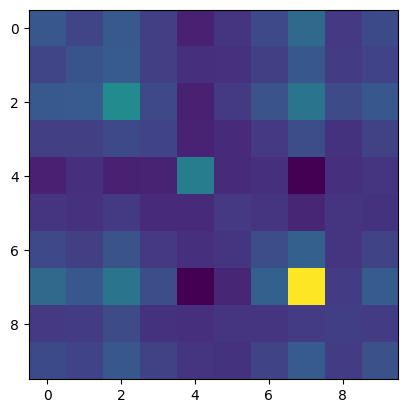

In [ ]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

In [ ]:
num_assets = 10 # número de ações que iremos analisar
q = 0.5  # fator de risco
budget = num_assets // 2  # quantidade de ações a serem escolhidas
penalty = num_assets  # garantimos que nosso código respeite budget

portfolio = PortfolioOptimization(
    expected_returns=mu_array, covariances=sigma_array, risk_factor=q, budget=budget
)
qp = portfolio.to_quadratic_program()
print(qp)

minimize 0.00015372402577556928*x_0^2 + 0.0001714997939906367*x_0*x_1 + 0.00032809209550619577*x_0*x_2 + 0.00012611962363772098*x_0*x_3 - 8.464959508440083e-05*x_0*x_4 + 4.7389550929907174e-05*x_0*x_5 + 0.00019573159350805432*x_0*x_6 + 0.0004752882167154916*x_0*x_7 + 7.402478631681409e-05*x_0*x_8 + 0.0002053555975844462*x_0*x_9 + 0.00014133987505577264*x_1^2 + 0.0003476764544703354*x_1*x_2 + 0.00012512020042237802*x_1*x_3 + 1.6743563461626565e-05*x_1*x_4 + 2.1174051217885592e-05*x_1*x_5 + 0.00013185717476250965*x_1*x_6 + 0.00030740049589974904*x_1*x_7 + 0.00010502373355965879*x_1*x_8 + 0.0001543782323529898*x_1*x_9 + 0.00038582993893216246*x_2^2 + 0.00019964882151579096*x_2*x_3 - 8.486293500438364e-05*x_2*x_4 + 8.629828885948962e-05*x_2*x_5 + 0.00027487083452568004*x_2*x_6 + 0.0005580681706147927*x_2*x_7 + 0.00021092416934789153*x_2*x_8 + 0.00030842450548989095*x_2*x_9 + 7.535000937536656e-05*x_3^2 - 6.538942673097177e-05*x_3*x_4 - 1.5399913128481715e-05*x_3*x_5 + 7.795474686292692e-05

In [ ]:

def print_result(result):
    selection = result.x # result.x retorna a solução ótima em matriz de 0 e 1 da função result, que nós teremos.
    value = result.fval
    print("Optimal: selection {}, value {:.4f}".format(selection, value))

    eigenstate = result.min_eigen_solver_result.eigenstate
    probabilities = (
        eigenstate.binary_probabilities()
        if isinstance(eigenstate, QuasiDistribution)
        else {k: np.abs(v) ** 2 for k, v in eigenstate.to_dict().items()}
    )
    print("\n----------------- Full result ---------------------")
    print("selection\tvalue\t\tprobability")
    print("---------------------------------------------------")
    probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

    for k, v in probabilities:
        x = np.array([int(i) for i in list(reversed(k))])
        value = portfolio.to_quadratic_program().objective.evaluate(x)
        print("%10s\t%.4f\t\t%.4f" % (x, value, v))

#NumPyMinimumEigensolver (as a classical reference)

Lets solve the problem. First classically…

We can now use the Operator we built above without regard to the specifics of how it was created. We set the algorithm for the NumPyMinimumEigensolver so we can have a classical reference. The problem is set for ‘ising’. Backend is not required since this is computed classically not using quantum computation. The result is returned as a dictionary.

In [ ]:
from qiskit_algorithms import NumPyMinimumEigensolver, SamplingVQE

exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

result = exact_eigensolver.solve(qp)

bestclassical = result.x

print_result(result)

Optimal: selection [0. 1. 0. 1. 1. 0. 0. 0. 1. 1.], value -0.0126

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 1 1 0 0 0 1 1]	-0.0126		1.0000


#Solution using SamplingVQE
We can now use the Sampling Variational Quantum Eigensolver (SamplingVQE) to solve the problem. We will specify the optimizer and variational form to be used.

In [ ]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 1234 # aqui, estamos apenas definindo uma seed aleatória randomizada

cobyla = COBYLA()
'''

COBYLA COBYLA é um método de otimização baseado em aproximação linear, o que significa que ele não precisa calcular derivadas da função objetivo.
Isso o torna útil para problemas onde a função não é diferenciável ou é muito cara de derivar, COMO NO NOSSO CASO, ONDE NOSSA FUNÇÃO quadratica é enorme

'''

cobyla.set_options(maxiter=500) # setando o máximo de iterações do cobyla para 500 - oque muda em cada iteração?
ry = TwoLocal(num_assets, "ry", "cz", reps=3, entanglement="full")

svqe_mes = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=cobyla)
svqe = MinimumEigenOptimizer(svqe_mes)
result = svqe.solve(qp)

bestVQE  = result.x # aqui estamos pegando a melhor solução obtido no resultado do nosso VQE que foi rodado.

print_result(result)

#montante, lucro obtido (percentual e monetario), hamiltoniano do cubo

Optimal: selection [0. 1. 0. 1. 1. 1. 0. 0. 0. 1.], value -0.0108

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 1 0 1 1 0 0 1]	-0.0037		0.0547
[0 0 1 1 1 0 1 0 0 1]	0.0037		0.0371
[1 1 0 0 0 0 1 0 1 0]	0.0078		0.0293
[1 1 0 0 0 1 0 0 1 0]	0.0043		0.0264
[0 0 0 1 0 1 1 0 0 1]	-0.0035		0.0244
[1 1 0 1 0 1 1 0 0 1]	-0.0002		0.0195
[0 0 1 1 1 0 1 0 1 1]	0.0039		0.0186
[0 1 0 1 0 1 1 0 0 0]	0.0015		0.0176
[1 1 0 0 0 0 0 0 1 0]	0.0022		0.0176
[1 1 0 0 0 0 0 1 1 0]	0.0107		0.0156
[0 1 0 0 0 1 1 0 0 1]	0.0012		0.0127
[1 1 0 0 0 1 1 1 1 0]	0.0186		0.0117
[0 0 1 1 1 0 1 0 0 0]	0.0088		0.0117
[0 0 0 1 0 1 1 0 1 1]	-0.0034		0.0117
[1 0 1 0 1 0 0 0 1 0]	0.0115		0.0107
[0 1 0 1 0 0 1 0 0 1]	-0.0057		0.0107
[1 1 0 1 0 1 1 0 0 0]	0.0049		0.0107
[0 1 1 1 0 1 1 0 0 1]	0.0074		0.0098
[0 1 0 1 0 0 1 0 1 1]	-0.0056		0.0098
[1 0 1 0 0 0 1 0 1 0]	0.0188		0.0098
[0 0 0 1 1 1 1 0 0 1]	-0.0049		0.0098
[1 0 0 0 0 1 0 0

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


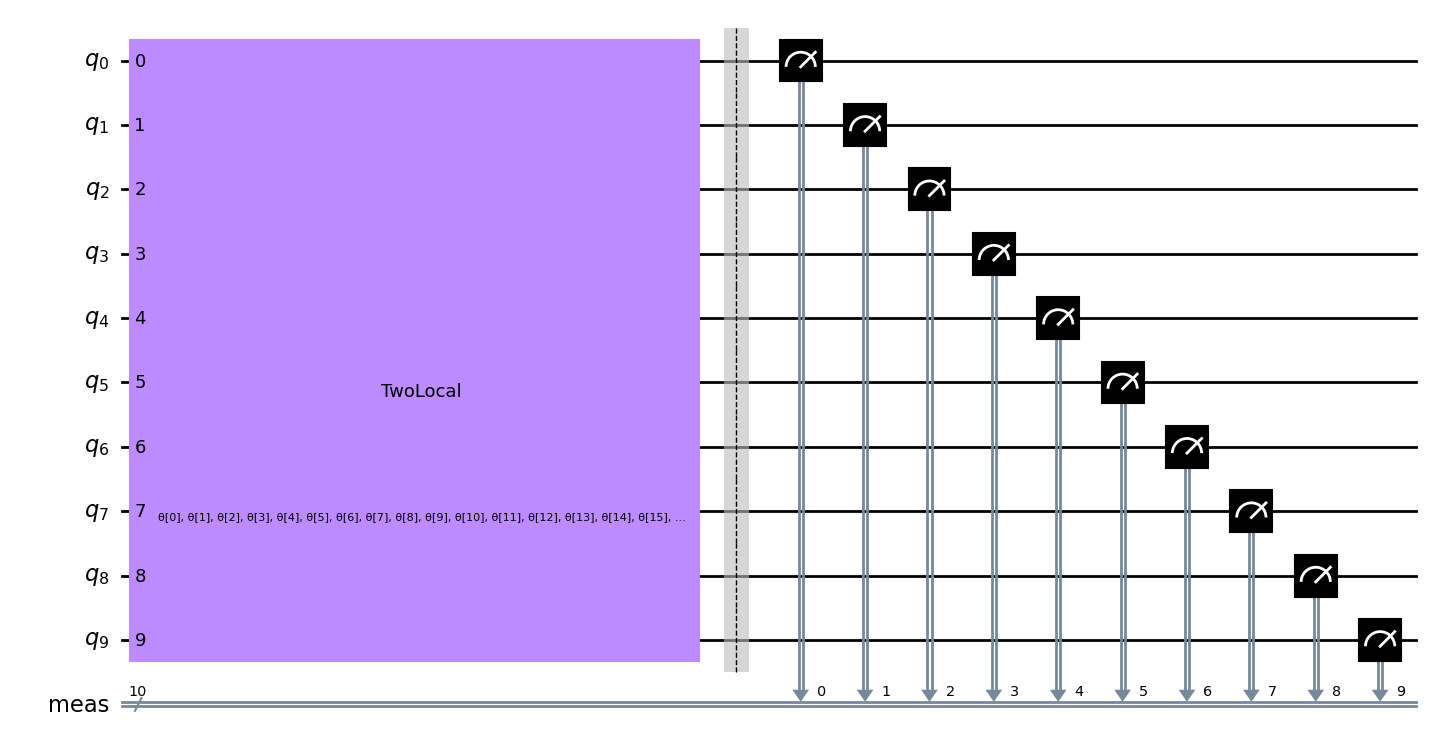

In [ ]:
ry.draw("mpl")  # Usa Matplotlib para visualizar

In [ ]:
print(ry)

         »
    q_0: »
         »
    q_1: »
         »
    q_2: »
         »
    q_3: »
         »
    q_4: »
         »
    q_5: »
         »
    q_6: »
         »
    q_7: »
         »
    q_8: »
         »
    q_9: »
         »
meas: 10/»
         »
«         ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«    q_0: ┤0                                                                                                                                                                                                                                                 ├»
«         │                                                                                                                                                                                                                                

In [ ]:
from qiskit import transpile
transpiled_circuit = transpile(ry, optimization_level=3)
transpiled_circuit.draw("text")

┌──────────┐                                                         »
    q_0: ┤ Ry(θ[0]) ├─■──■─────■─────■────────■────────■───────────■──────────»
         ├──────────┤ │  │     │     │        │        │           │          »
    q_1: ┤ Ry(θ[1]) ├─■──┼──■──┼──■──┼─────■──┼─────■──┼────────■──┼────────■─»
         ├──────────┤    │  │  │  │  │     │  │     │  │        │  │        │ »
    q_2: ┤ Ry(θ[2]) ├────■──■──┼──┼──┼──■──┼──┼──■──┼──┼─────■──┼──┼─────■──┼─»
         ├──────────┤          │  │  │  │  │  │  │  │  │     │  │  │     │  │ »
    q_3: ┤ Ry(θ[3]) ├──────────■──■──┼──■──┼──┼──┼──┼──┼──■──┼──┼──┼──■──┼──┼─»
         ├──────────┤                │     │  │  │  │  │  │  │  │  │  │  │  │ »
    q_4: ┤ Ry(θ[4]) ├────────────────■─────■──┼──■──┼──┼──■──┼──┼──┼──┼──┼──┼─»
         ├──────────┤                         │     │  │     │  │  │  │  │  │ »
    q_5: ┤ Ry(θ[5]) ├─────────────────────────■─────■──┼─────■──┼──┼──■──┼──┼─»
         ├──────────┤                                  │        │  │     │  │ »
    q_6: ┤ Ry(θ[6]) ├──────────────────────────────────■────────■──┼─────■──┼─»
         ├──────────┤                                              │        │ »
    q_7: ┤ Ry(θ[7]) ├──────────────────────────────────────────────■────────■─»
         ├──────────┤                                                         »
    q_8: ┤ Ry(θ[8]) ├─────────────────────────────────────────────────────────»
         ├──────────┤                                                         »
    q_9: ┤ Ry(θ[9]) ├─────────────────────────────────────────────────────────»
         └──────────┘                                                         »
meas: 10/═════════════════════════════════════════════════════════════════════»
                                                                              »
«                           ┌───────────┐                               »
«    q_0: ─■──────────────■─┤ Ry(θ[10]) ├───────────────────────■───────»
«          │              │ └───────────┘         ┌───────────┐ │       »
«    q_1: ─┼───────────■──┼─────────────────────■─┤ Ry(θ[11]) ├─■───────»
«          │           │  │                     │ └───────────┘         »
«    q_2: ─┼────────■──┼──┼──────────────────■──┼─────────────────────■─»
«          │        │  │  │                  │  │                     │ »
«    q_3: ─┼─────■──┼──┼──┼───────────────■──┼──┼──────────────────■──┼─»
«          │     │  │  │  │               │  │  │                  │  │ »
«    q_4: ─┼──■──┼──┼──┼──┼───────■───────┼──┼──┼───────────────■──┼──┼─»
«          │  │  │  │  │  │       │       │  │  │               │  │  │ »
«    q_5: ─┼──■──┼──┼──┼──┼───────┼───────┼──┼──┼───────■───────┼──┼──┼─»
«          │     │  │  │  │       │       │  │  │       │       │  │  │ »
«    q_6: ─┼─────■──┼──┼──┼───────■───────┼──┼──┼───────■───────┼──┼──┼─»
«          │        │  │  │               │  │  │               │  │  │ »
«    q_7: ─┼────────■──┼──┼───────────────■──┼──┼───────────────■──┼──┼─»
«          │           │  │                  │  │                  │  │ »
«    q_8: ─■───────────■──┼──────────────────■──┼──────────────────■──┼─»
«                         │                     │                     │ »
«    q_9: ────────────────■─────────────────────■─────────────────────■─»
«                                                                       »
«meas: 10/══════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                            »
«    q_0: ──────────────■──────────────────■──────────────────■──────────────»
«                       │                  │                  │              »
«    q_1: ──────────────┼──■───────────────┼──■───────────────┼───────■──────»
«         ┌───────────┐ │  │               │  │               │       │      »
«    q_2: ┤ Ry(θ[12]) ├─■──■───────────────┼──┼───────■───────┼───────┼─

# Filtrando as ações selecionadas de todas as analisadas no VQE e no NumpyMEclassico

In [ ]:
# nossa matriz de melhores resultados é dada por:
best_results = np.array([bestclassical, bestVQE]) # vamos plotar um gráfico do markowitz pra cada solução obtida por cada abordagem.

# Com isso, note que devemos plotar o Markowitz apenas para as ações selecionadas pelo VQE ou pela solução clássica.

VQE_selecionadas = np.array(tickers)[best_results[1] == 1]
classical_selecionadas = np.array(tickers)[best_results[0] == 1]
print(VQE_selecionadas)
print(classical_selecionadas)
print(len(df_close))

['SLCE3.SA' 'JBSS3.SA' 'TEND3.SA' 'PETR4.SA' 'TIMS3.SA']
['SLCE3.SA' 'JBSS3.SA' 'TEND3.SA' 'PSSA3.SA' 'TIMS3.SA']
20


# Agora vamos colocar a saída do SamplingVQE dentro do nosso modelo de Markowitz!


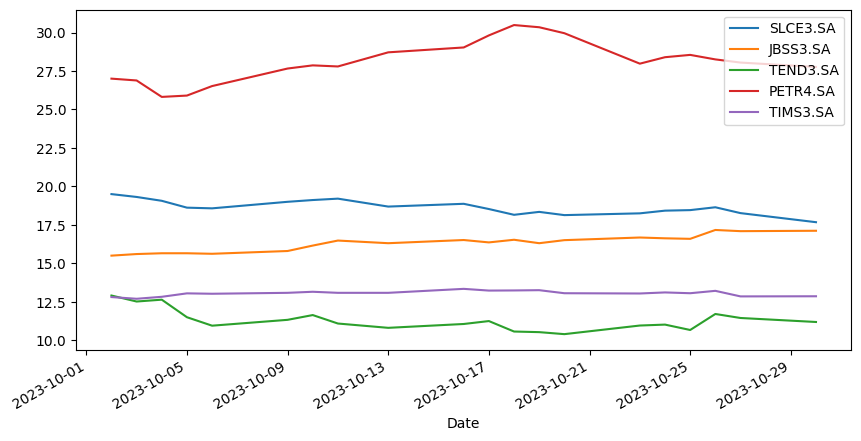

O retorno mensal de cada ação é de  SLCE3.SA   -0.103435
JBSS3.SA    0.104405
TEND3.SA   -0.150507
PETR4.SA    0.029208
TIMS3.SA    0.004230
dtype: float64
A covariancia de cada ação é de            SLCE3.SA  JBSS3.SA  TEND3.SA  PETR4.SA  TIMS3.SA
SLCE3.SA  0.004936  0.001553  0.007707  0.000051  0.000994
JBSS3.SA  0.001553  0.002963  0.004645 -0.001306  0.000735
TEND3.SA  0.007707  0.004645  0.038393 -0.005922  0.001828
PETR4.SA  0.000051 -0.001306 -0.005922  0.013083  0.000327
TIMS3.SA  0.000994  0.000735  0.001828  0.000327  0.002431


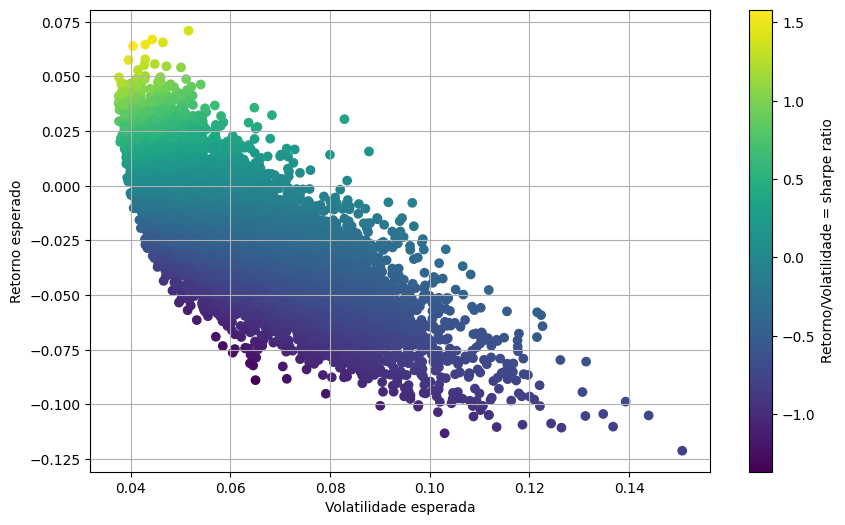

[0.00893689 0.60880891 0.02618968 0.14872955 0.20733497] 7961
1.5811306479183644


In [ ]:
# na média, possuímos 252 dias de trades no ano (dias em que o mercado está aberto)
NUM_TRADING_DAYS = len(df_close) # aqui o número de trading days é exatamente o número de dias no qual operamos no mercado (20 dias no caso dessa análise)
# irá geral 10000 grupos de pesos aleatórios e diferentes para cada uma das ações
NUM_PORTFOLIOS = 10000

#Dados historicos - define a data de análise inicial e final

stocks = VQE_selecionadas # vamos fazer o primeiro teste com as stocks obtidas pelo VQE

# obs: as ações, data de início e data final de análise já estao definidas lá em cima.

def download_data():
    #nome das stocks (key) - preços das ações
    stock_data = {}

    for stock in stocks:
        # vamos pegar só os preços de fechamento do dia
        ticker = yf.Ticker(stock) # o que é esse ticker de fato?
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close'] # 'Close' pois quremos apenas os preços de fechamento do dia
    return pd.DataFrame(stock_data)


def show_data(data_frame):
    data_frame.plot(figsize=(10,5))
    plt.show()

def calculate_return(data): # aqui, usaremos a o retorno do lucro em forma de log, pois é mais tradicional
    log_return = np.log(data / data.shift(1)) # data.shift(1) está pegando um elemento a frente do elemento pego em data
    return log_return[0:]

def show_statistics(returns):
  # ao inves de usamos o lucro diário, costumamos usar o lucro anual
  # com isso, calcularemos a média dos dias e multiplicaremos pelo número de dias de trade, definidos acima
  print('O retorno mensal de cada ação é de ', returns.mean()*NUM_TRADING_DAYS)
  print('A covariancia de cada ação é de ', returns.cov()*NUM_TRADING_DAYS) # calculando a covariancia média anual - essa nos retorna a matriz de covariancia, explicada no curso

def show_mean_variance(returns, weights):
  portfolio_return = np.sum(returns.mean()*weights)*NUM_TRADING_DAYS
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*NUM_TRADING_DAYS, weights)))

  print('valor experado do portfólio (média mensal): ', portfolio_return)
  print('volatilidade do portfólio (desvio padrão mensal): ', portfolio_volatility)

def generate_portfolios(returns): # aqui iremos gerar n portfolios aleatórios para julgar, nos baseando nas taxas de retorno e desvio padrão, qual o melhor portfolio a escolher
  # basicamente, iremos gerar 10000 diferentes portfólios, cada um com um valor percentual aleatório pra cada ação e com isso, veremos qual o portfolio mais otimizado
  portfolio_means = []
  portfolio_risk = []
  portfolio_weights = []

  for _ in range(NUM_PORTFOLIOS):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights) # w = w/np.sum(w) - estamos normalizando os peso, pois sabemos que a soma deles devem ser = 1
    portfolio_weights.append(weights)
    portfolio_means.append(np.sum(returns.mean()*weights)*NUM_TRADING_DAYS)
    portfolio_risk.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*NUM_TRADING_DAYS, weights))))

  return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risk)

def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10,6))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Volatilidade esperada')
    plt.ylabel('Retorno esperado')
    plt.colorbar(label='Retorno/Volatilidade = sharpe ratio')
    plt.show()

def statistics(weights, inputs): # estamos criando uma cópia da def show_statistics, mas agora, com o intuito de jogar essas estatisticas no cálculo da sharpe ratio
  portfolio_return = np.sum(inputs.mean()*weights)*NUM_TRADING_DAYS
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(inputs.cov()*NUM_TRADING_DAYS, weights)))

  return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])


# note, scipy optmize pode achar o mínimo de uma dada função. COm isso, o máximo de uma função f(x) é igual ao mínimo de -f(x), por isso o sinal negativo do return
def min_function_sharpe(weights, returns):
    return statistics(weights, returns)[2] * -1 # estamos pegando apenas a sharpe ratio, definida na def 'statistics'

def optimize_portfolios(weights, returns):
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # constraints será a cond de contorno que define que a soma de nossos pesos deve ser =1
    bounds = tuple((0,1) for _ in range(len(stocks)))


if __name__ == '__main__':
    dataset = download_data()
    # print(dataset)
    show_data(dataset)
    retorno_diario_logaritmo = calculate_return(dataset)
    # show_statistics(retorno_diario_logaritmo)
    show_statistics(retorno_diario_logaritmo)
    pweights, means, risks = generate_portfolios(retorno_diario_logaritmo)
    show_portfolios(means, risks)
    sharpe_ratio = means/risks
    max_sharpe_ratio = pweights[sharpe_ratio.argmax()] # essa matriz nos retornará os pesos obtidos da maior sharpe_ratio obtida
    print(max_sharpe_ratio, sharpe_ratio.argmax())
    print(sharpe_ratio[sharpe_ratio.argmax()]) # temos um luco de 60%? - AQUI estamos printando a melhor sharpe ratio, que é o elemento de número (sharpe_ratio.argmax()) da nossa matriz sharpe_ratio
    # show_mean_variance(retorno_diario_logaritmo, max_sharpe_ratio) -  não sei o que isso faz, mas depois vou dar uma olhada

In [ ]:
print(sharpe_ratio[sharpe_ratio.argmax()]) # temos um luco de 60%?

1.5811306479183644


# Vamos pegar o melhor portfólio possível, dado pelo Markowitz e comparar com a bolsa de valores naquele período



/tmp/ipython-input-18-677547611.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibovTreino = yf.download('^BVSP', start='2023-10-01', end='2023-11-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-18-677547611.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibovTeste = yf.download('^BVSP', start='2023-11-01', end='2023-11-30')
[*********************100%***********************]  1 of 1 completed


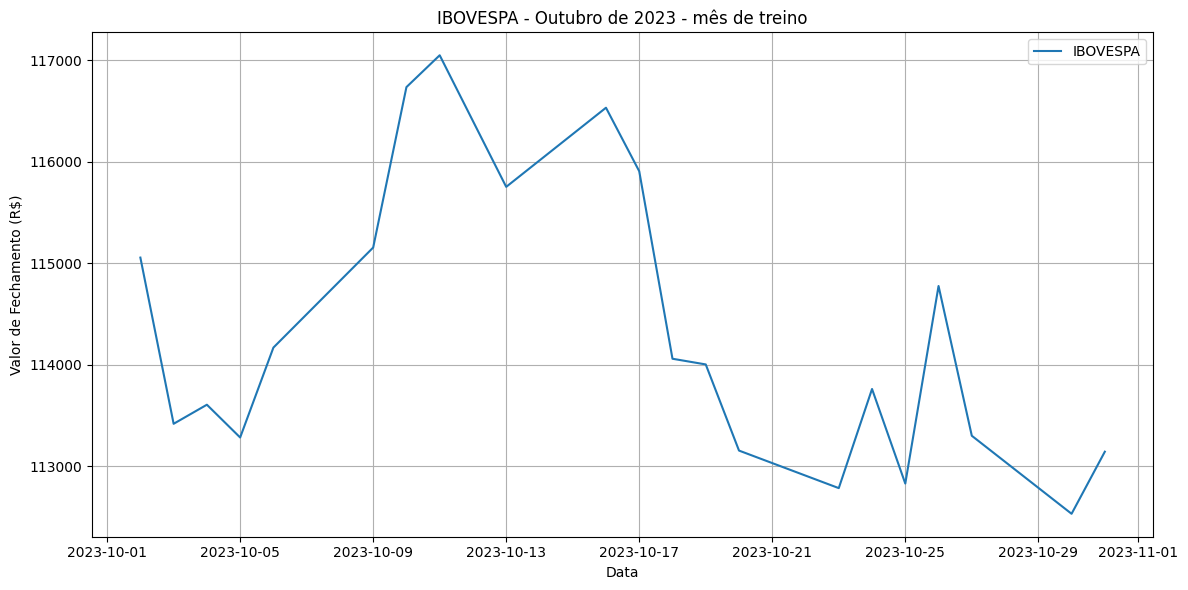

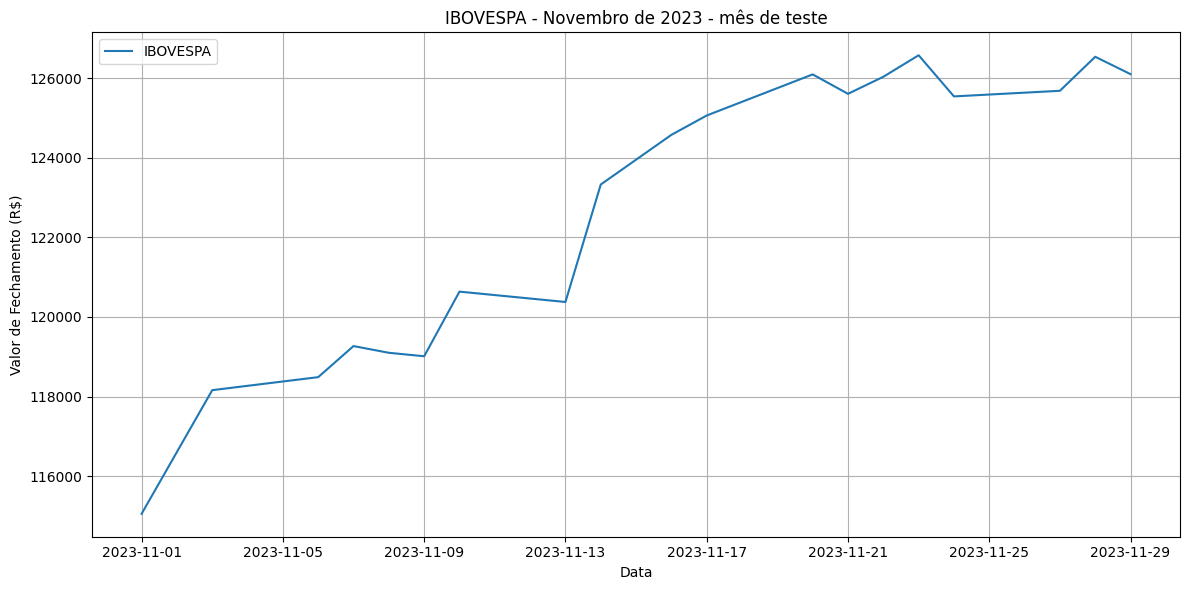

In [ ]:
# Plotando o gráfico do preço da bolsa de valores no mês de outubro de 2023 -

# Baixar os dados do IBOVESPA (ticker: ^BVSP)
ibovTreino = yf.download('^BVSP', start='2023-10-01', end='2023-11-01')
ibovTeste = yf.download('^BVSP', start='2023-11-01', end='2023-11-30')

# Plotar o gráfico de fechamento diário - mês de treino (10/23)
plt.figure(figsize=(12, 6))
plt.plot(ibovTreino['Close'], label='IBOVESPA')
plt.title('IBOVESPA - Outubro de 2023 - mês de treino')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento (R$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar o gráfico de fechamento diário - mês de teste (11/23)
plt.figure(figsize=(12, 6))
plt.plot(ibovTeste['Close'], label='IBOVESPA')
plt.title('IBOVESPA - Novembro de 2023 - mês de teste')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento (R$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Vamos realizar o código de tomada de decisão (compra ou venda das ações e sua monetização) - realizaremos uma compra a cada 7 dias

In [ ]:
quantia = 10000 # quantia para investimento
valor_acoes = 0 # variavel que marca o valor total em açoes na carteira
# obs. para acharmos o nome do rotulo (label) de uma coluna, usamos df_acoes.columns[1] e o retorno sera, nesse caso: ALOS3.SA


# n_ativos = len(df_close.columns) # aqui possuimos 100 ativos
n_ativos = num_assets # aqui possuimos 10 ativos, como definido anteriormente
# declarando os vetores
predicao = np.zeros((n_ativos), "float32")
carteira = np.zeros((n_ativos), "int32")
custo = np.zeros((n_ativos), "float32")

# Investindo todo nosso dinheiro noa Ibovespa, ao invês de comparar com o Markowitz

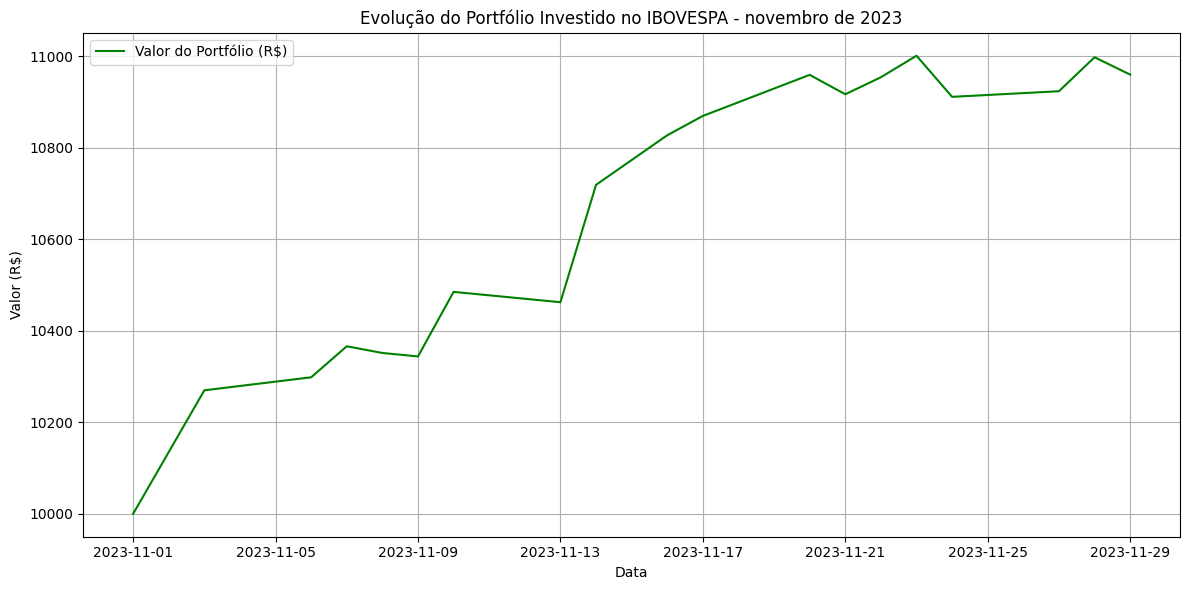

In [ ]:
# Pro caso de simplesmente investirmos 10k na bovespa ao invês de realizar a aplicação do Markowitz e comprar as ações de maior sharpe ratio

# Preço de fechamento no primeiro dia útil
preco_inicial = ibovTeste['Close'].iloc[0]

# Calcular o valor do portfólio a cada dia com base na variação percentual
portfolio = (ibovTeste['Close'] / preco_inicial) * quantia

# Plotar gráfico da evolução do portfólio
plt.figure(figsize=(12, 6))
plt.plot(portfolio, label='Valor do Portfólio (R$)', color='green')
plt.title('Evolução do Portfólio Investido no IBOVESPA - novembro de 2023')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Investindo todo nosso dinheiro na disposição que obtemos do Markowitz, após a análise minuciosa realizada pela otimização quântica e a seleção da melhor sharpe ratio dada pelo Markowitz

Lembre-se que a análise foi realizada para o mês de outubro e realizaremos a compra apenas no primeiro dia de novembro.

In [ ]:
# Transformando nossa array numpy do VQE_selecionadas em uma lista (pra colocar como imput no yfinance)
VQE_selecionadas = list(VQE_selecionadas)
type(VQE_selecionadas)

list

/tmp/ipython-input-22-2309200943.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-22-2309200943.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados = dados.fillna(method='ffill')


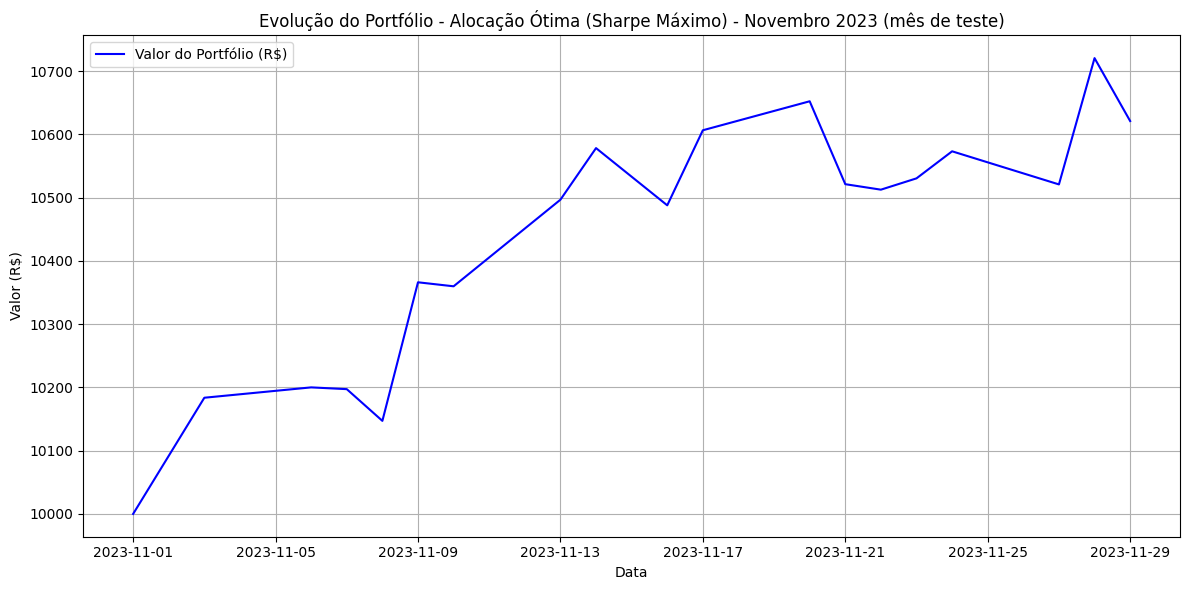

In [ ]:
# Definindo as variáveis necessárias - max_sharpe_ratio, que nos dará os pesos de investimento

# Lista dos tickers
tickers = VQE_selecionadas # ações selecionadas do VQE

# Período de investimento (novembro de 2023)
start_date = '2023-11-01'
end_date = '2023-11-30'

# Pesos do portfólio (resultado do Max Sharpe Ratio - já normalizados) - max_sharpe_ratio é nossa mariz de pesos

# Valor total a investir
valor_inicial = quantia

# Baixar preços de fechamento ajustado
dados = yf.download(tickers, start=start_date, end=end_date)['Close']

# Preencher valores ausentes se necessário (por ex., com forward fill)
dados = dados.fillna(method='ffill')

# Preço inicial de cada ativo (primeiro dia útil)
precos_iniciais = dados.iloc[0]

# Quantidade de ações compradas de cada ativo
quantidades = (valor_inicial * max_sharpe_ratio) / precos_iniciais

# Valor diário do portfólio
valor_portfolio_diario = (dados * quantidades).sum(axis=1)

# Plotar gráfico da evolução do portfólio
plt.figure(figsize=(12, 6))
plt.plot(valor_portfolio_diario, label='Valor do Portfólio (R$)', color='blue')
plt.title('Evolução do Portfólio - Alocação Ótima (Sharpe Máximo) - Novembro 2023 (mês de teste)')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Comparando a ibovespa com as ações selecionadas a partir da otimização quântica e análise de Markowitz

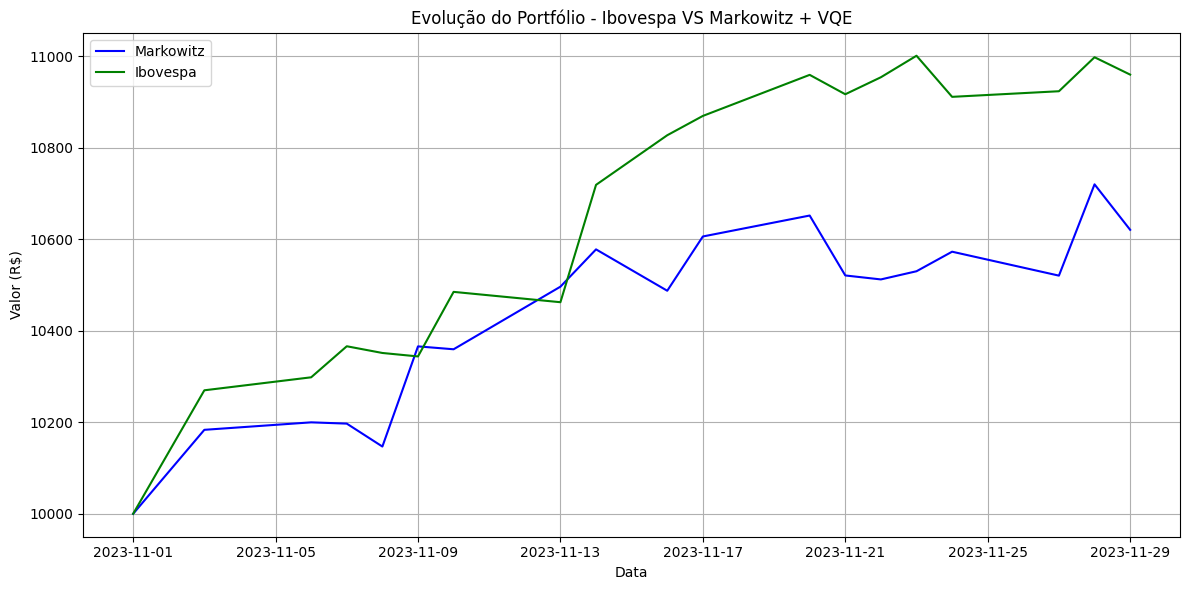

In [ ]:
# Plotar gráfico da evolução do portfólio
plt.figure(figsize=(12, 6))
plt.plot(valor_portfolio_diario, label='Markowitz', color='blue')
plt.plot(portfolio, label='Ibovespa', color='green')
plt.title('Evolução do Portfólio - Alocação Ótima (Sharpe Máximo) - Outubro 2023')
plt.title('Evolução do Portfólio - Ibovespa VS Markowitz + VQE')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# avaliando
print("test_day ", type(test_day[0]))
for i in range(n_ativos):
    # print("ativo", i)
    lin_model.load_weights("pesosRec" + str(n_dias) + "/training_ML_" + str(i) + "/cp.ckpt")
    predicao[i] = lin_model.predict(np.asarray([test_day[0],]))
    # se a reta estiver ascendente...
    if lin_model.predict(np.asarray([test_day[1],])) > predicao[i]:
        # diferença do valor dado pela reta com o valor atual
        dif = predicao[i] - test_df.iloc[0,i]
        # se a reta estiver acima do valor da ação, futuramente ela deve subir
        if dif > 0:
            #compra
            for c in range(10):
                if quantia >= test_df.iloc[0,i]:
                    carteira[i] +=1
                    quantia -= test_df.iloc[0,i]
                    custo[i] += test_df.iloc[0,i]
                else:
                    break
        # caso contrário ela deve descer
        else:
            # venda
            if carteira[i] > 0:
                quantia += (test_df.iloc[0, i] * carteira[i])
                custo[i] = 0
                carteira[i] = 0

#calculo dos valores atuais da carteira a cada dia
for i in range(len(carteira)):
    valor_acoes += (test_df.iloc[0, i] * carteira[i])
print(f"quantia: {quantia}")
print(f"valor total: {quantia + valor_acoes}")
valor_acoes = 0
print(carteira)

NameError: name 'test_day' is not defined